In [273]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import *
from scipy.optimize import curve_fit

In [2]:
with open('/Users/Marvin/Documents/Berkeley/XBeam/_DATA/111020/11102013', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = []
    for row in reader:
        data.append(int(row[0]))

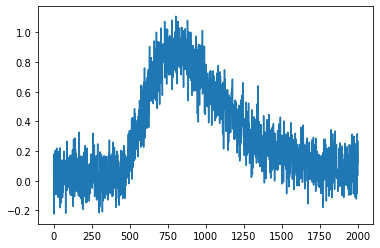

In [3]:
dwell = 1
data = data[:2000]
baseline = np.mean(data[:10])
data = data - baseline

maximum_loc = np.argmax(data)
maxline = np.mean(data[maximum_loc-2:maximum_loc+2])
data /= maxline

timedata = np.linspace(1/dwell, len(data)/dwell, num=len(data))

plt.plot(timedata,data)
plt.show()

In [4]:
def maxbol(time,mass,s,Temp):
    MASS = mass/1000
    dtime = -6 + 18.8 + 4.8 * (mass**0.5)
    time0 = (time + dtime) * (10**-6)
    ENERGY = 2 * 8.314 * Temp
    EXP = np.exp(-MASS*((s/time0)**2)/ENERGY)
    DIST = s**3/time0**4 * EXP
    
    return DIST  

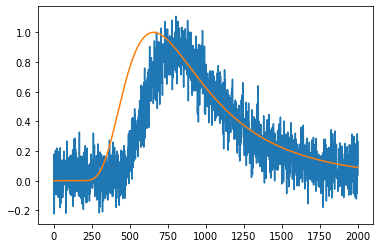

In [5]:
simulation = maxbol(timedata,170,0.1716,281)
simulation /= np.max(simulation)

plt.plot(timedata,data)
plt.plot(simulation)
plt.show()

https://books.google.com/books?hl=en&lr=&id=0chPSpRpjo0C&oi=fnd&pg=PA21&dq=supersonic+beam+distribution&ots=8aFABvYmd7&sig=40M8NcerV0rRMeBSLkKrVL6_pxM#v=onepage&q=supersonic%20beam%20distribution&f=false

In [6]:
with open('/Users/Marvin/Documents/Berkeley/XBeam/_DATA/102720/10272012', newline='') as csvfile:
#with open('/Users/Marvin/Documents/Berkeley/XBeam/_DATA/102720/10272039', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = [] 
    for row in reader:
        data.append(int(row[0]))

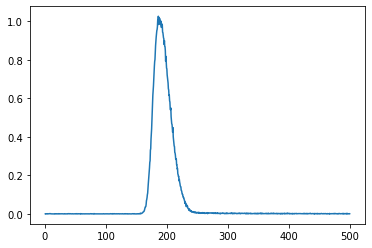

In [7]:
data = data[:1000]
dwell = 2

baseline = np.mean(data[:10])
data = data - baseline

maximum_loc = np.argmax(data)
maxline = np.mean(data[maximum_loc-2:maximum_loc+2])
data /= maxline

timedata = np.linspace(1/dwell, len(data)/dwell, num=len(data))

plt.plot(timedata,data)
plt.show()

In [116]:
def supersonic(timedata, mass, s, gamma, T0, x, D, x0_D, A):
    
    MACH = A*(x/D - x0_D)**(gamma-1) - .5*((gamma+1)/(gamma-1))/(2*A*(x/D - x0_D)**(gamma-1))
    print('Mach', MACH)
    
    MASS = mass/1000
    dtime = -6 + 18.8 + 4.8 * (mass**0.5) 
    time0 = (timedata + dtime) * (10**-6) #+ 0.036/1370
    TEMP = T0 / (1 + .5*(gamma - 1)*MACH**2)
    print('temp',TEMP)
    ENERGY = 2 * 8.314 * TEMP
    
    u = MACH*(ENERGY * gamma / MASS)**.5
    print('velocity',u)
    print('timemax', np.argmax(data)/dwell + dtime)
    u = 0.1716 / ((np.argmax(data)/dwell  + dtime) * 10**-6)
    print('velocity',u)
    
    VELO = s / time0 

    EXP = np.exp(-MASS* (VELO-u)**2 / ENERGY)
    DIST = VELO**3 * EXP
    
    return DIST  

In [266]:
def supersonic(timedata, mass, s, u, du):
    
    dtime = -6 + 18.8 + 4.8 * (mass**0.5)
    time0 = (timedata - dtime) * (10**-6)
    VELO = s / time0 

    EXP = np.exp(-(du**2)* ((VELO-u)/u)**2)
    DIST = VELO**2 * EXP
    DIST/= np.max(DIST)  
    
    return DIST

In [271]:
res,_ = curve_fit(supersonic
                , timedata
                , data
                , bounds=([39., .1715, 1, 0], [40., .1716, 2000, 100])
                )

velocity 1151.7084578372578


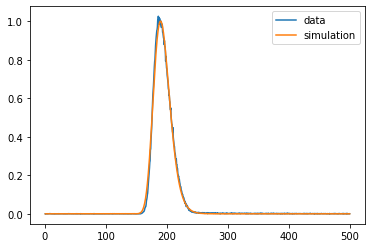

In [274]:
simulation = supersonic(timedata, *res)
print('velocity',res[2])

plt.plot(timedata,data)
plt.plot(timedata,simulation)
plt.legend(['data','simulation'])
plt.show()